In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import PyUber
from datetime import datetime


def main():
    spices = SQL_DataFrame(sql)
    spices.to_csv('spices.csv', index=False)
    
def convert_to_date(df, column1='MEAS_SET_DATA_COLLECT_DATE', column2='LOT_DATA_COLLECT_DATE', \
                    column3='CURRENT_MOVEIN_DATE', column4='END_DATE'):
    if column1 in df.columns:
        df[column1] = pd.to_datetime(df[column1])
    if column2 in df.columns:
        df[column2] = pd.to_datetime(df[column2])
    if column3 in df.columns:
        df[column3] = pd.to_datetime(df[column3])
    if column4 in df.columns:
        df[column4] = pd.to_datetime(df[column4])
    return df

def SQL_DataFrame(sql, source='D1D_PROD_XEUS'):
    conn = PyUber.connect(source)
    df = pd.read_sql(sql, conn)
    return df


sql="""
SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION a2 ON a2.spcs_id = a3.spcs_id
LEFT JOIN P_SPC_LOT a0 ON a0.spcs_id = a2.spcs_id
INNER JOIN P_SPC_ENTITY a1 ON a2.spcs_id = a1.spcs_id AND a1.entity_sequence=1
LEFT JOIN P_SPC_CHART_POINT a5 ON a5.spcs_id = a3.spcs_id AND a5.measurement_set_name = a3.measurement_set_name
LEFT JOIN P_SPC_CHART_LIMIT a10 ON a10.chart_id = a5.chart_id AND a10.limit_id = a5.limit_id
WHERE
              (a1.entity LIKE 'LAT%' )
 AND      a5.value Is Not Null  
 AND      a3.data_collection_time >= TRUNC(SYSDATE) - 90 
 AND      a2.monitor_type = 'TOOL MONITOR' 
 AND      a3.parameter_class = 'DEFECT_PARTICLE' 
"""


#if __name__ == "__main__": main()

In [2]:
ss = SQL_DataFrame(sql)
dstr = str(datetime.now())[:10]

In [43]:
entities = ss.ENTITY.unique()
entity=entities[0]
sst = ss[ss['ENTITY']==entity]
st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']
st=st.sort_values(by='LOT_DATA_COLLECT_DATE')
x = st['LOT_DATA_COLLECT_DATE']
y = st['CHART_VALUE']
#plt.plot(x,y,'o')

In [44]:
fname = 'figs/'+entity+'-'+dstr
print(fname)

figs/LAT426_PM3-2021-02-25


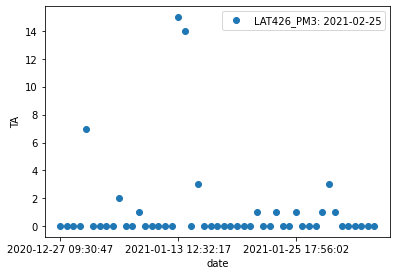

In [46]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax = plt.subplot(111)
ax.plot(x, y, 'o')
ax.set_xlabel('date')
ax.set_ylabel('TA')
ax.set_xticks(ax.get_xticks()[::18])
#plt.title('title')
ax.legend([entity+': '+dstr])
fig.savefig(fname)

C:\Users\narju\.conda\envs\IntelLearn\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


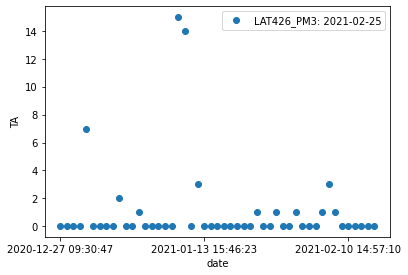

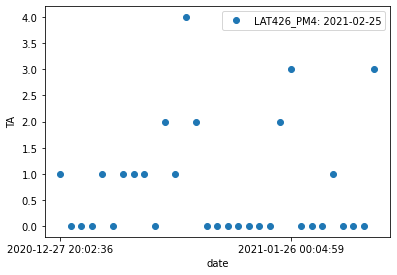

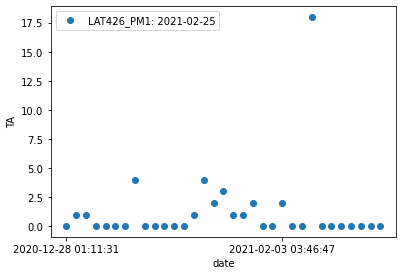

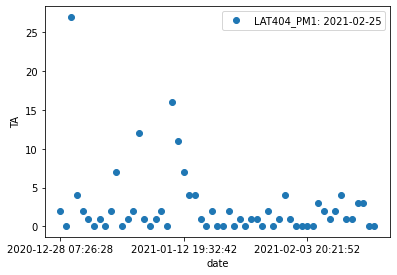

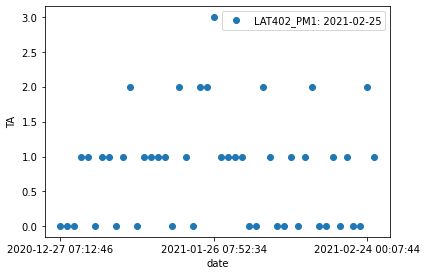

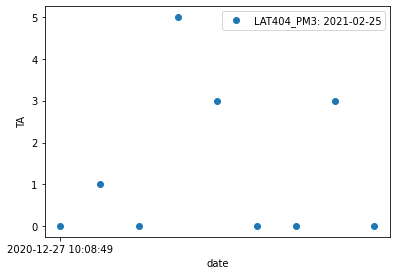

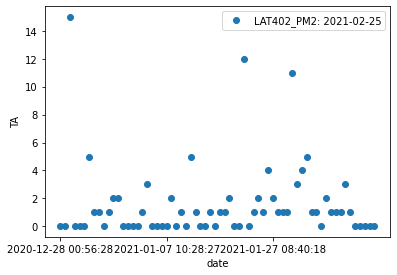

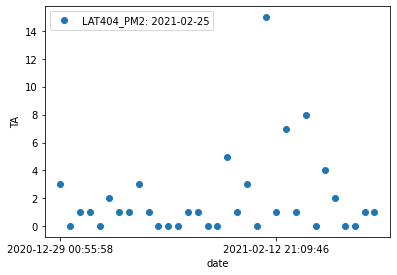

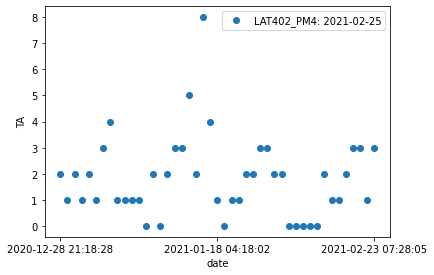

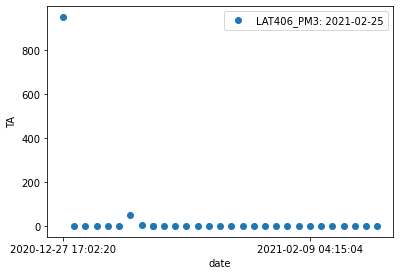

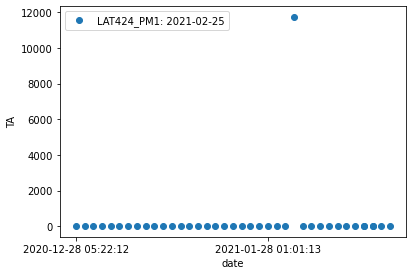

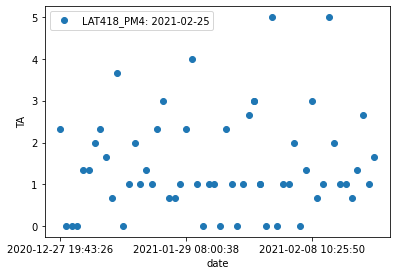

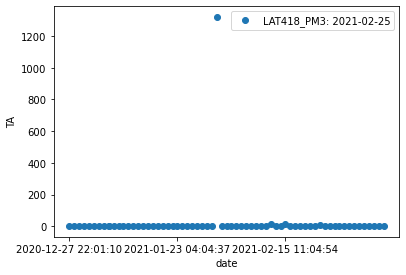

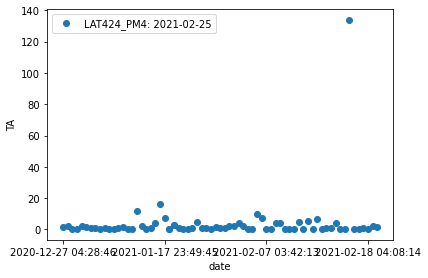

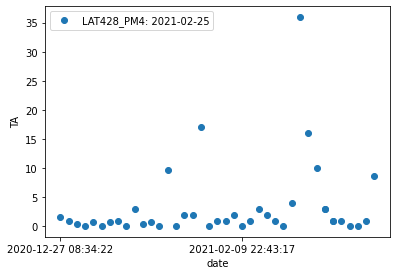

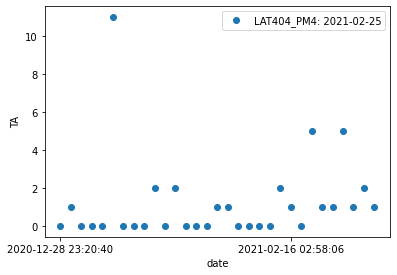

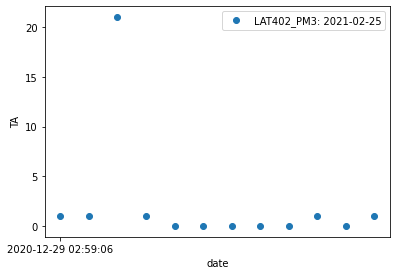

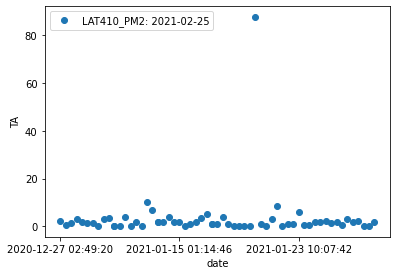

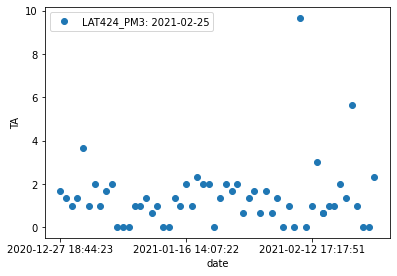

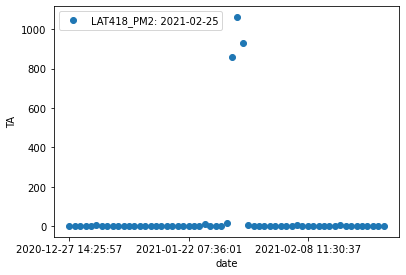

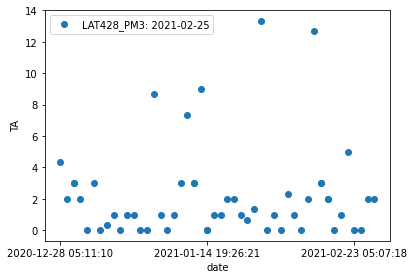

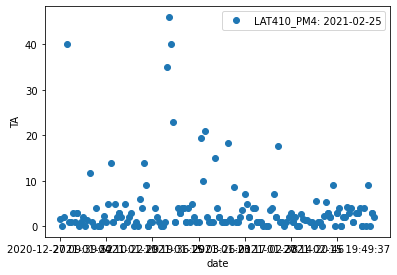

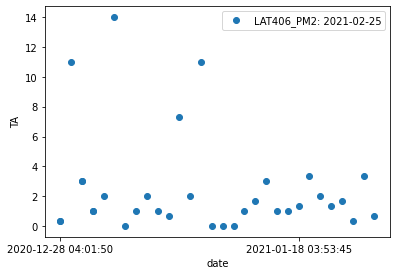

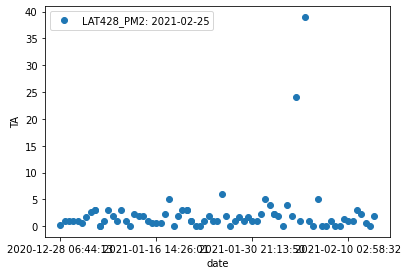

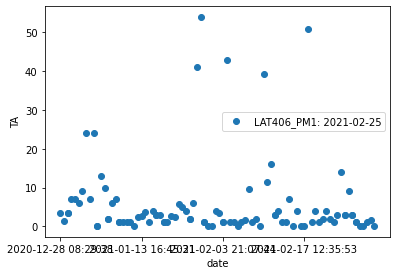

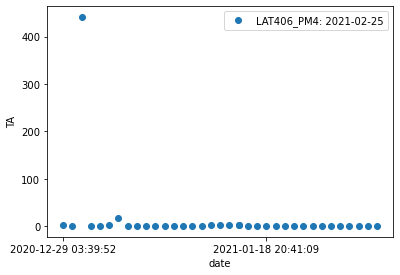

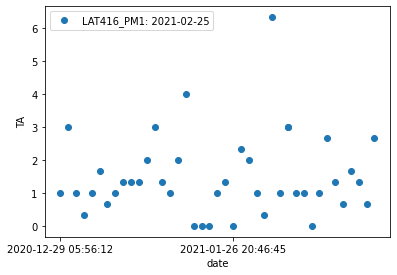

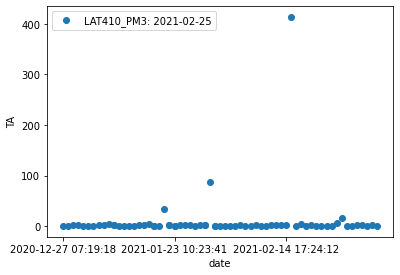

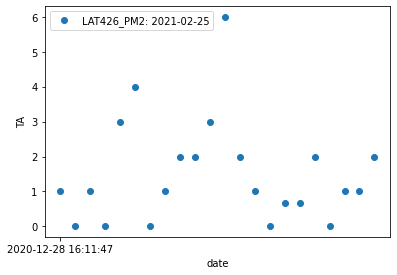

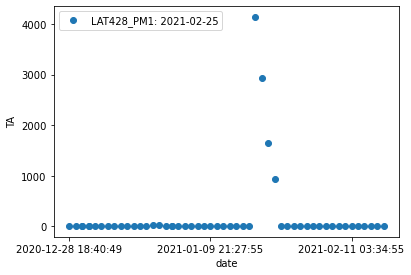

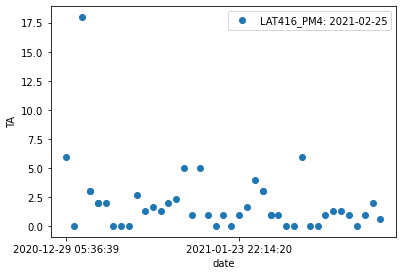

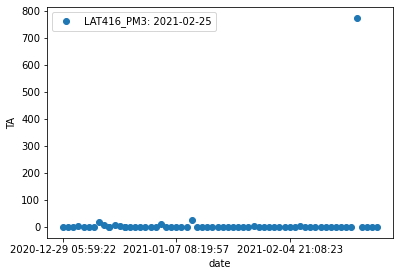

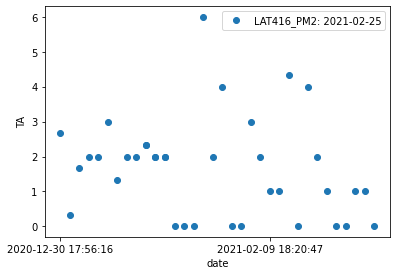

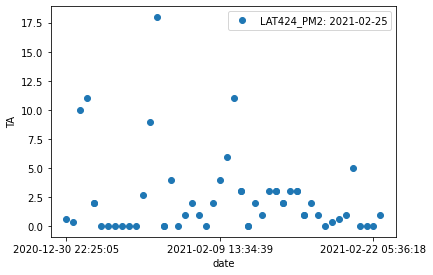

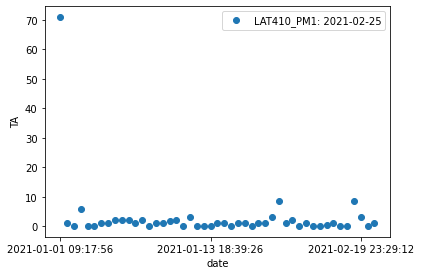

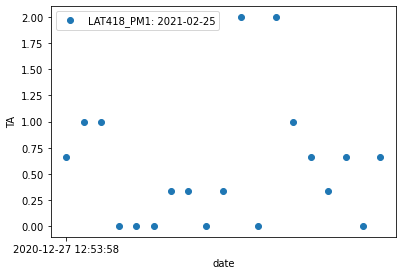

In [39]:
for entity in entities:
    #entity=entities[0]
    sst = ss[ss['ENTITY']==entity]
    st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']
    st=st.sort_values(by='LOT_DATA_COLLECT_DATE')
    x = st['LOT_DATA_COLLECT_DATE']
    y = st['CHART_VALUE']
    fname = 'figs/'+entity+'-'+dstr
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    #ax = plt.subplot(111)
    ax.plot(x, y, 'o')
    ax.set_xlabel('date')
    ax.set_ylabel('TA')
    ax.set_xticks(ax.get_xticks()[::18])
    #plt.title('title')
    ax.legend([entity+': '+dstr])
    fig.savefig(fname)
    plt.close()

In [47]:
len(x)

49

In [3]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import PyUber
from datetime import datetime
import glob

def main():
    spices = SQL_DataFrame(sql)
    spices.to_csv('spices.csv', index=False)
    
def convert_to_date(df, column1='MEAS_SET_DATA_COLLECT_DATE', column2='LOT_DATA_COLLECT_DATE', \
                    column3='CURRENT_MOVEIN_DATE', column4='END_DATE'):
    if column1 in df.columns:
        df[column1] = pd.to_datetime(df[column1])
    if column2 in df.columns:
        df[column2] = pd.to_datetime(df[column2])
    if column3 in df.columns:
        df[column3] = pd.to_datetime(df[column3])
    if column4 in df.columns:
        df[column4] = pd.to_datetime(df[column4])
    return df

def SQL_DataFrame(sql, source='D1D_PROD_XEUS'):
    conn = PyUber.connect(source)
    df = pd.read_sql(sql, conn)
    return df


sql="""
SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION a2 ON a2.spcs_id = a3.spcs_id
LEFT JOIN P_SPC_LOT a0 ON a0.spcs_id = a2.spcs_id
INNER JOIN P_SPC_ENTITY a1 ON a2.spcs_id = a1.spcs_id AND a1.entity_sequence=1
LEFT JOIN P_SPC_CHART_POINT a5 ON a5.spcs_id = a3.spcs_id AND a5.measurement_set_name = a3.measurement_set_name
LEFT JOIN P_SPC_CHART_LIMIT a10 ON a10.chart_id = a5.chart_id AND a10.limit_id = a5.limit_id
WHERE
              (a1.entity LIKE 'LAT%' 
              OR a1.entity LIKE 'PAT%')
 AND      a5.value Is Not Null  
 AND      a3.data_collection_time >= TRUNC(SYSDATE) - 420 
 AND      a3.data_collection_time <= TRUNC(SYSDATE) - 330 
 AND      a2.monitor_type = 'TOOL MONITOR' 
 AND      a3.parameter_class = 'DEFECT_PARTICLE' 
"""

ss = SQL_DataFrame(sql)
dstr = ss['LOT_DATA_COLLECT_DATE'].max()[:10]
fname = 'LAT~SPC~defect~' + dstr + '.csv'

entities = ss.ENTITY.unique()
for entity in entities:
    #entity=entities[0]
    sst = ss[ss['ENTITY']==entity]
    st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

    st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
    st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'TA'})
    st.index = pd.to_datetime(st.t)
    st.drop(['t'], axis=1, inplace = True)
    st=st.sort_index()
    st=st.resample('3D').mean()
    
    st=st.interpolate(method='linear')
    st=np.log(st+1)
    if len(st)<20: continue
    st = st[len(st)-20:]
    
    fname = 'TA~'+entity+'~'+dstr
    
    if 1==2: #do plot
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
        #ax = plt.subplot(111)
        ax.plot(st, 'o')
        ax.set_xlabel('date')
        ax.set_ylabel('TA')
        ax.set_xticks(ax.get_xticks()[::3])
        #plt.title('title')
        ax.legend([entity+': '+dstr])
        fig.savefig('figs/'+fname)
        plt.close()
    

#if __name__ == "__main__": main()

2020-10-04


In [1]:
pasts = [-240, -270, -300, -330, -360, -390, -420, -450]

In [2]:
type(pasts)

list

In [3]:
len(pasts)

8